# Homework 2

## 2)

Starting from the work in the pdf;

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from math import cos, sin, tan
import math
import random
from scipy import integrate

In [71]:
pi_mass = 0.135
#theta_0 = math.pi/2
theta_0s = []
energies = [0.3, 1.0, 5.0, 50.0, 200.0]
for i in range(0,5000):
    #theta_0s.append(random.randrange(-math.pi, math.pi))
    rand_num = random.randrange(-180, 180)
    rand_num = rand_num * (math.pi/180.0)
    theta_0s.append(rand_num)

thetas = [[None] * len(theta_0s)] * len(energies)

Text(0, 0.5, 'Count')

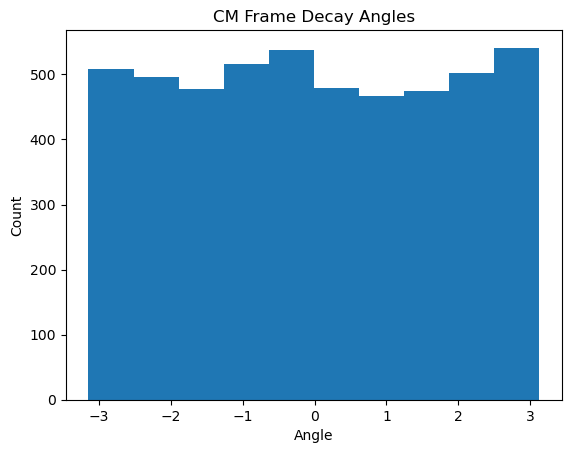

In [72]:
plt.hist(theta_0s)
plt.title("CM Frame Decay Angles")
plt.xlabel("Angle")
plt.ylabel("Count")

In [73]:
for i, energy, in enumerate(energies):
     theta_energy = []
     for j, angle in enumerate(theta_0s):
          gamma = energies[i]/pi_mass
          beta = math.sqrt((gamma**2-1)/gamma**2)
          #print(beta)
          cos_theta_lab = (cos(theta_0s[j])+beta)/(1+cos(theta_0s[j])*beta)
          theta_lab = math.acos(cos_theta_lab)
          #thetas[i].append(theta_lab)
          theta_energy.append(theta_lab)

     thetas[i]= theta_energy

Text(0.5, 1.0, 'Lab Frame Decay Angles for Various Energies')

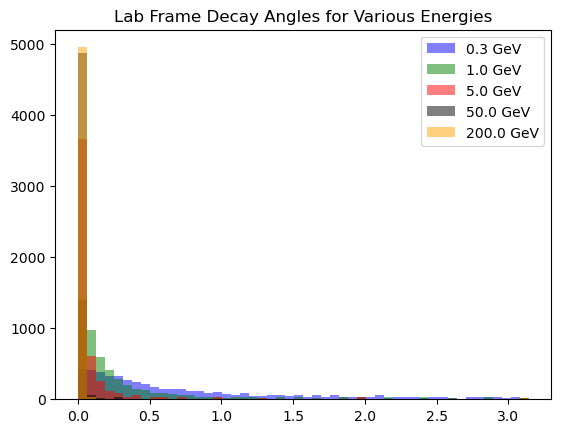

In [74]:
fig, ax = plt.subplots()
facecolors = ["Blue", "Green", "Red", "Black", "Orange"]

for i in range(len(facecolors)):
    ax.hist(thetas[i], bins=50, alpha=0.5, label=f"{energies[i]} GeV", facecolor=facecolors[i], histtype='stepfilled')

ax.legend()
ax.set_title(r"Lab Frame Decay Angles for Various Energies")


As the $\pi^0$ becomes more energetic, the resulting photons from decay will be increasingly colomated in the original direction of travel.

For the specific case $\epsilon=0.4789\text{ GeV}$ we can figure out what fraction will be in the forward direction $|{\theta}|\leq\pi/2$

In [75]:
epsilon = 0.4789
gamma = epsilon/pi_mass
beta = math.sqrt((gamma**2-1)/gamma**2)
counts = 0

for j in range(len(theta_0s)):
    lab_cos_theta = (cos(theta_0s[j])+beta)/(1+cos(theta_0s[j])*beta)
    theta_lab = math.acos(lab_cos_theta)
    if theta_lab <= math.pi/2:
        counts+=1

print(counts/len(theta_0s))

0.905


We can see that over $\%{}90$ of the photons are emitted in the forward direction at only $0.4789\text{ GeV}$.

## 5)

We can say that; from the Bethe-Bloche formula

In [76]:
#constants
me = 0.511
mp = 938.3
mu = 105.7
re = 2.82
K = 0.307

In [77]:
def bethe_bloche(p, mass, mat):
    Z, A, rho, I = mat
    K = 3.07075
    E = np.sqrt(p**2 + mass**2)
    beta = p/E

    dEdx = (K*(Z/A)*(1/beta**2)) *(0.5*np.log((2*me* beta**2 * gamma**2 / I)) - beta**2)

    return dEdx * rho
    #return dEdx

In [78]:
# Listing in order Z, A, rho, I
materials = {
    "Al": (13, 26.98, 2.699, (166*10**(-6))),
    "Plastic": (0.538, 1, 1.06, (68.7*(10**-6))), # Has (Z/A) ratio listed, so putting that in for Z and 1 for A
    "Cu": (29, 63.5, 8.96, (322 * (10**-6))),
    "Pb": (82, 207.2, 11.35, (823*(10**-6))),
    "H2O": (0.555, 1, 1, (79.7*(10**-6)))
}

### a)

In [79]:
p = np.logspace(-1, 6, 1000)

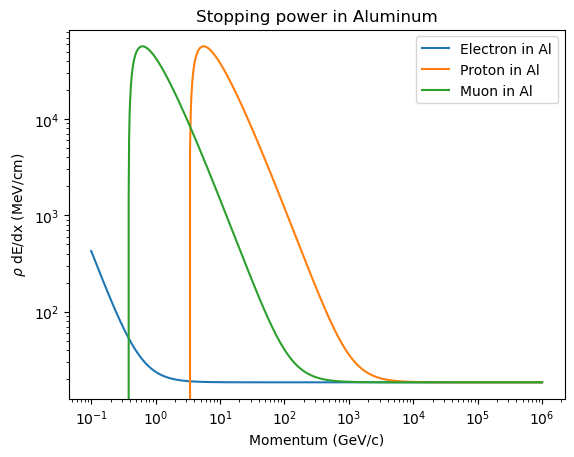

In [106]:
plt.figure()
for mass, label in [(me, "Electron"), (mp, "Proton"), (mu, "Muon")]:
    dEdx_Al = bethe_bloche(p, mass, materials["Al"])
    plt.loglog(p, dEdx_Al, label=f"{label} in Al")

plt.xlabel("Momentum (GeV/c)")
plt.ylabel(r"$\rho$ dE/dx (MeV/cm)")
plt.title("Stopping power in Aluminum")
plt.legend()

### b)

Text(0.5, 1.0, 'Muons in various materials')

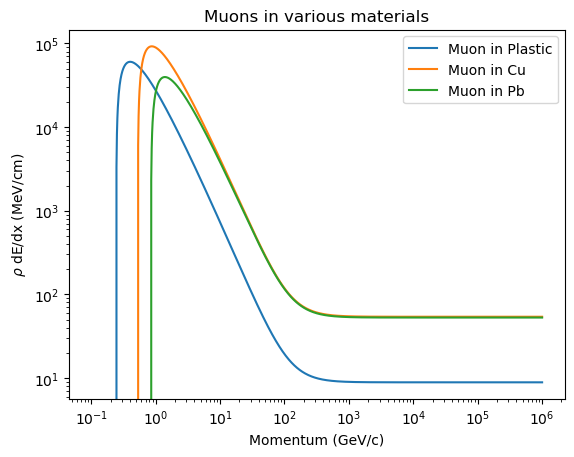

In [107]:
plt.figure()
for material in ["Plastic", "Cu", "Pb"]:
    dEdx_Mu = bethe_bloche(p, mu, materials[material])
    plt.loglog(p, dEdx_Mu, label=f"Muon in {material}")

plt.xlabel("Momentum (GeV/c)")
plt.ylabel(r"$\rho$ dE/dx (MeV/cm)")
plt.legend()
plt.title("Muons in various materials")

### c)

Recall that the range is $$R(E)=\int_{E}^{0}dE/(dE/dx)$$

In [82]:
Es = np.sqrt(p**2 + mu**2)
Ts = Es-mu

dEdx_H2O = bethe_bloche(p, mu, materials["H2O"])

In [ ]:
R = -integrate.cumulative_trapezoid((1/dEdx_H2O[::-1]), Ts[::-1], initial=0) #negative to flip bounds of integration

Text(0.5, 1.0, 'Muon Ranges')

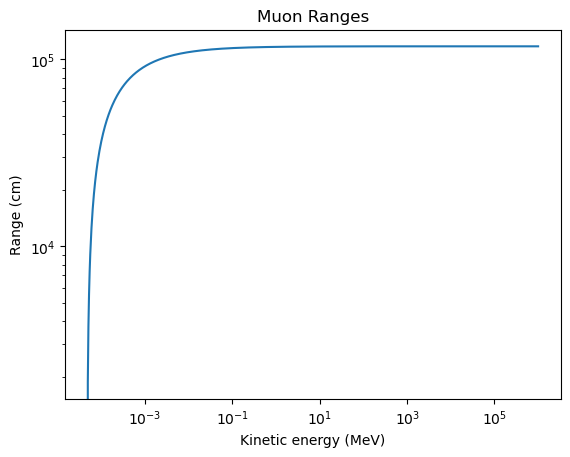

In [104]:
plt.figure()
plt.loglog(Ts, R)
plt.xlabel("Kinetic energy (MeV)")
plt.ylabel("Range (cm)")
plt.title("Muon Ranges")
